# BridgeHacks Python Workshop

Hi, welcome to BridgeHacks. 

In this Python workshop, we'll walk through some useful building blocks for making data pipelines, visualizing data, and experimenting with and analyzing data models, using an example. The purpose of this workshop is to introduce you to helpful packages/libraries in Python for your own data driven/data intensive projects. 

You can always revisit this Jupyter Notebook to refer to any code that might be applicable. If there's something referenced here that you'd like to learn more about, follow the links scattered through the Jupyter Notebook to learn more about different topics.

Feel free clone this repo and explore it in your own local environment as we walk through it!

**Notes:** 

This Jupyter Notebook runs as is in my local environment, but if you're missing Python or some packages/libraries, you may get some error messages. 

You may need to download Python, a package manager and/or Jupyter Notebook first.

To download Python, I'd recommend downloading the most recent release manually from the Python website: https://www.python.org/. If you're a Mac user, I'd also recommend checking out the well-written instructions here (this way might require a little more familiarity with your Terminal/command line), which explains a method that is more robust to future updates: https://opensource.com/article/19/5/python-3-default-mac.

Two good options for package managers are pip and conda, but there are many others. Here is a good run-down of both: https://www.anaconda.com/blog/understanding-conda-and-pip. 

Instructions for installing pip: https://pip.pypa.io/en/stable/installing/

Instructions for installing conda: https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html

To download Jupyter Notebook, following the instructions here: https://jupyter.org/install. The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Many engineers use Jupyter Notebook as their tool of choice for data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

Lastly, if you're looking for a Python editor/IDE, two that I personally use frequently are Sublime (https://www.sublimetext.com/), for those that prefer a text editor, and PyCharm (https://www.jetbrains.com/pycharm/), for those that prefer an IDE.

## Introduction

I thought a good way to introduce everyone to Python was to walk through an example workflow for a machine learning task.

The task we'll be working on today is identifying whether news articles are true or fake news. In machine learning, we'd call this a binary classification task, since in the task, we want to predict whether a given news article input is in one of two classes, true news or fake news. This kind of task falls under a subdomain of artificial intelligence called natural language processing, which deals with analyzing natural language. I chose this task because I thought it was a salient problem that would illustrate the applicability of all of this Python.

I found a dataset to use with labeled news articles on Kaggle, a website that brings together data scientists and machine learning engineers/researchers to solve various problems. There are many datasets on there, so if you're interested in doing a project like this one, Kaggle would be a good first stop to look for datasets.

The dataset we're using today: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset. You can download it directly from Kaggle, but the dataset files should also already be in the repo containing this Jupyter Notebook.

Citation

Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).

## Pre-process Dataset

To start off, we're going to import some packages/libraries to pre-process our dataset.

NumPy is a popular library that's commonly used for working with large amounts of data. Documentation: https://numpy.org/doc/stable/.

Pandas is another popular data analysis library. Documentation: https://pandas.pydata.org/docs/.

Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning. Documentation: https://radimrehurek.com/gensim/auto_examples/index.html.

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The makers of spaCy have some beautiful documentation of their software: https://spacy.io/usage/spacy-101. The documentation most relevant to the code here can be found at: https://spacy.io/api/tokenizer.

In [1]:
import numpy as np
import pandas
import gensim.downloader as api
from spacy.lang.en import English

In [2]:
# Reading in the data from our dataset files
# numpy also has something similar, but sometimes the numpy function does not play nicely with 
# text data in csv format, so we use the pandas function here

# These functions read the dataset files into dataframes. You can think of these like gigantic 2D arrays for data.
# numpy has something similar called a numpy array. We'll eventually be moving all this data to numpy arrays.
true = pandas.read_csv('True.csv')
fake = pandas.read_csv('Fake.csv')

In [3]:
# pandas lets you view just the first couple rows of your dataframe with head
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# This code grabs the text column holding the text of the news articles and puts all of it in one big Python
# list. This is the text we're going to use to train our models, so we're separating it from the other
# available data.
texts_true = list(true['text'])
texts_fake = list(fake['text'])
texts = texts_true + texts_fake

In [5]:
# Create a Tokenizer using spaCy with the default settings for English, 
# including punctuation rules and exceptions
nlp = English()
tokenizer = nlp.Defaults.create_tokenizer(nlp)

# Tokenize a stream of texts into word tokens, store in X
# After this runs, X will be a list of lists, where each element list contains all of the words from the
# text of a news article.
X = []
for doc in tokenizer.pipe(texts):
    # Here, we're filtering out tokens that are stop words or punctuation. This is a common
    # step done to pre-processing textual data for NLP problems.
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    X.append(tokens)

In [6]:
# Construct the list of labels, where 1 will represent a true news label and 0 will represent a fake news label
# We want to make these labels into numbers so that we can train models on them. String labels aren't compatible
# with the scikit-learn (sklearn) library we'll use to train the machine learning models. 

# Since there are only two labels, I'm mapping them manually, but if you have more than two label classes, 
# sklearn has a helpful LabelEncoder for encoding labels into numbers here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

# Notice also that the ordering of the true and fake list concatenation is the same as for X. This is important
# since it needs to have the same ordering as the ordering of the tokenized word lists for the news articles in X,
# so the correct labels match up with the correct texts.
y = [1] * len(texts_true) + [0] * len(texts_fake)

In [7]:
# Stacks X and y vertically
data = np.column_stack((X, y))

## Word Embedding Models

Next, we're going to retrieve a word embedding model, so that we can vectorize our tokenized word lists
representing our news articles in terms of word embeddings, which are vector (of numbers) representing words.

Specifically, we'll be using models produced with Word2Vec. Word2Vec is a method used to construct a word
embedding. Read more here: https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa.

Simply put, Word2Vec uses a neural network to learn embeddings for a word, either by using a word to predict
its context or using a context to predict a word.

Here, we're going to use a pre-trained Word2Vec model that has been trained on a bunch of news and we're also
going to train a Word2Vec model for just our dataset, and use the word embeddings from both to build
our classification models.

In [8]:
from gensim.models import Word2Vec

Gensim provides many functions for working with Word2Vec models. This repo contains a lot more information about the pre-trained models and training datasets available through Gensim: https://github.com/RaRe-Technologies/gensim-data.

In [9]:
# Show info about available models/datasets
info = api.info()
info

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [10]:
# Pre-trained model
model_pt = api.load('word2vec-google-news-300')
w2v_pt = {w: vec for w, vec in zip(model_pt.index2word, model_pt.vectors)}

In [11]:
# Helper functions
def has_vector_representation(model, doc):
    # Check if at least one word of the document is in the
    # word2vec dictionary
    return not all(word not in model.vocab for word in doc)

def is_not_empty(text):
    return len(text) != 0

In [12]:
# Filters out news articles that do not contain any words that have a vector representation in the pre-trained
# word2vec model or are empty
print(data.shape)
filter_idx = [has_vector_representation(model_pt, doc) and is_not_empty(doc) for doc in data[:, 0]]
data = data[filter_idx]
print(data.shape)

(44898, 2)
(44181, 2)


In [13]:
# Separates the data into the tokenized word lists of the news articles' text (X) 
# and the true/fake news labels (y)
X, y = data[:, 0], data[:, 1].astype(int)

In [25]:
# Model trained on the dataset
model = Word2Vec(X, size=100, window=5, min_count=1, workers=4).wv
w2v = {w: vec for w, vec in zip(model_pt.index2word, model_pt.vectors)}

## Visualize Doc Embeddings

In order to make use of the word embedding models, we will implement an embedding vectorizer that is given a word -> vector mapping and vectorizes texts into doc embeddings by taking the mean (or weighted mean weighted by how rare/common a word is in the document) of all the vectors corresponding to individual words in the document. We'll see later that these vectorizers are counterparts to CountVectorizer and TdidfVectorizer, which are implemented for you in sklearn.

In [54]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(word2vec))])
        else:
            self.dim=0
            
    def fit(self, X, y=None):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(word2vec))])
        else:
            self.dim=0
        
    def fit(self, X, y=None):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # If a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf, 
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
    
        return self
    
    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

Now, we'll actually use the vectorizers to get the document embeddings for each of the news articles. More specifically, the fit and transform methods of the vectorizers turn the tokenized word lists of the text of the news articles into numerical vectors by averaging (weighted for TF-IDF version) the word embeddings generated from the Word2Vec models for the words in the news articles.

With some retrospective knowledge, I know that that the word embeddings generated from the Word2Vec model trained
on our dataset perform better than the pre-trained ones, so I'm going to vectorize using the word embeddings custom trained model, w2v, instead of the pre-trained model, w2v_pt.

In [35]:
vectorizer = TfidfEmbeddingVectorizer(w2v)
vectorizer.fit(X)

In [42]:
doc_embeddings = vectorizer.transform(X)

In [93]:
doc_embeddings.shape

(44181, 100)

As we can we can see, this gives us a document embedding representation of each of the 44181 news articles as a 100 dimensional numerical vector. Wohoo! 

In order to better understand these vector embeddings better, let's perform principal component analysis to reduce the dimensionality of the vectors to 2D and 3D, so we can visualize them (we can't really plot 100D vectors). 

Principal component analysis is a technique for reducing the dimensionality of high-dimensional datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. To read more about this: https://web.stanford.edu/class/cs168/l/l7.pdf.

In [43]:
# Using PCA function from sklearn
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(doc_embeddings)

In [53]:
# Using PCA function from sklearn
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(doc_embeddings)

To plot these 2D and 3D dimensionality reduced embeddings attained using PCA, we'll use a popular Python plotting library, Matplotlib. Documentation: https://matplotlib.org/contents.html#.

In [78]:
# Helper functions for plotting using matplotlib
def make_pca_plot_2d(x, y, labels):
    fig, ax = plt.subplots()
    u_labels = np.unique(labels)
    # np.unique sorts the labels, so we know the first label will be 0 and the second will be 1
    # so we order the labels in the ax.legend call in that order
    for label in u_labels:
        idx = np.where(labels == label)
        ax.plot(x[idx], y[idx], label=label, marker='.', linestyle='None')
    ax.legend(labels=['Fake News', 'True News'], title='Ground Truth Label', loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_title('Principal Component Analysis on News Article Embeddings')
    
def make_pca_plot_3d(x, y, z, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    u_labels = np.unique(labels)
    # np.unique sorts the labels, so we know the first label will be 0 and the second will be 1
    # so we order the labels in the ax.legend call in that order
    for label in u_labels:
        idx = np.where(labels == label)
        ax.scatter(x[idx], y[idx], z[idx], label=label, marker='.', linestyle='None')
    ax.legend(labels=['Fake News', 'True News'], title='Ground Truth Label', loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.set_zlabel('Third Principal Component')
    ax.set_title('Principal Component Analysis on News Article Embeddings')
    fig.tight_layout()

Observe the two lines %matplotlib inline and %matplotlib notebook in the following code. These built-in magic commands display the plots nicely in the Jupyter Notebook. More about magics here: https://ipython.readthedocs.io/en/stable/interactive/magics.html.

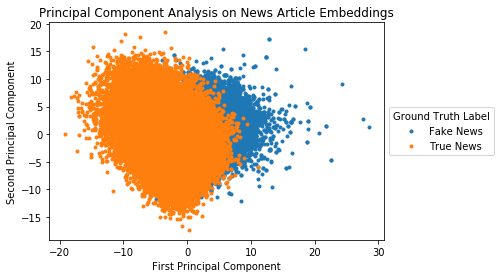

In [52]:
# Plot the dimensionality reduced doc embeddings, color coded by label (true news or fake news)
%matplotlib inline
make_pca_plot_2d(embeddings_2d[:, 0], embeddings_2d[:, 1], y)

<IPython.core.display.Javascript object>


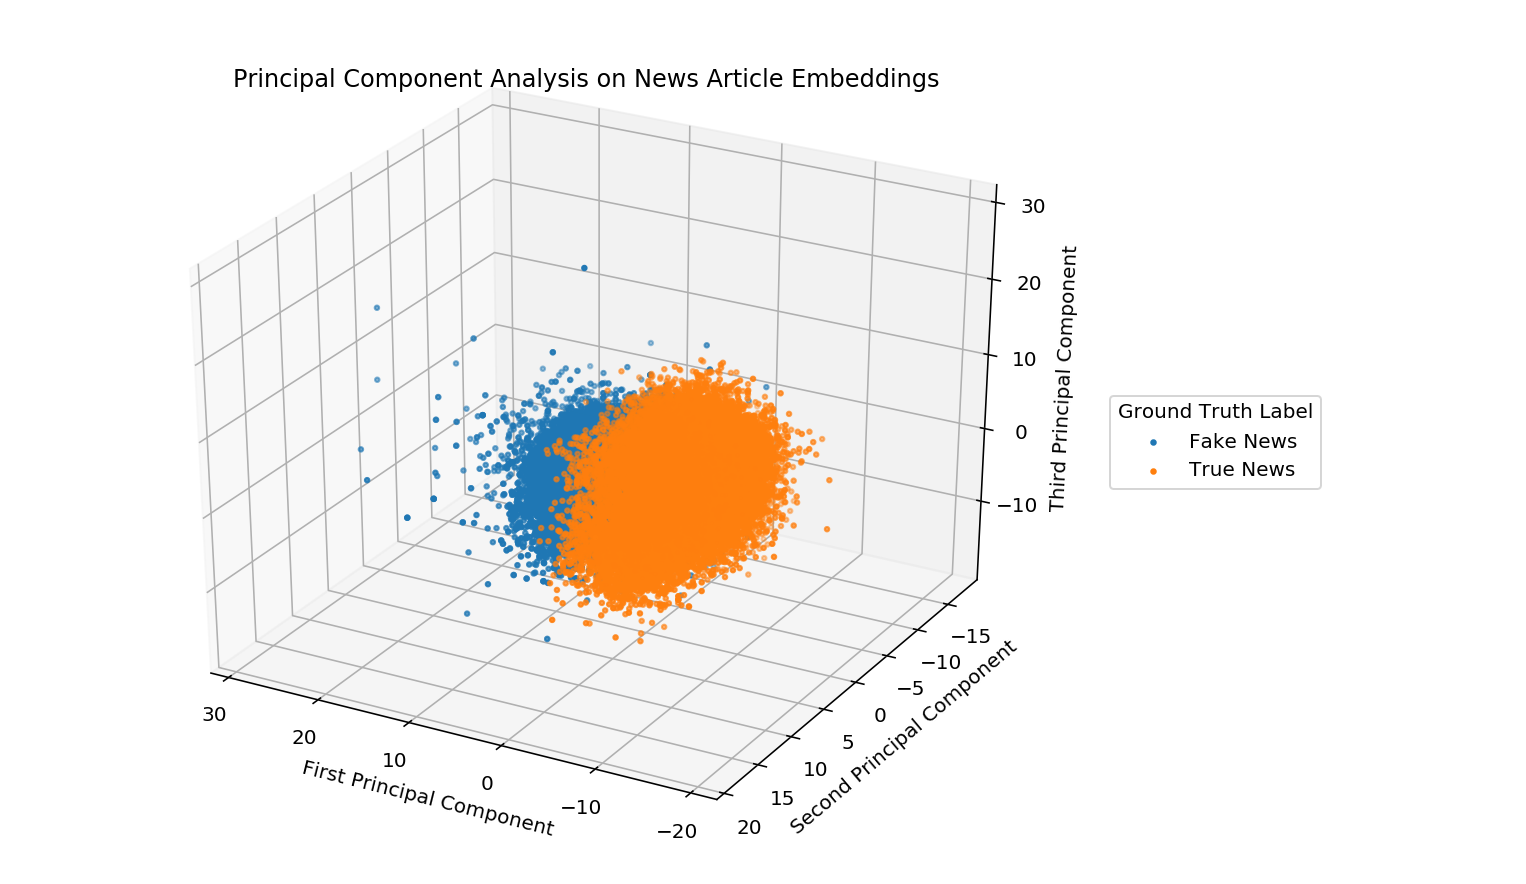

In [80]:
# Plot the dimensionality reduced doc embeddings, color coded by label (true news or fake news)
# Might have to write this #matplotlib notebook magic command twice. Sometimes it doesn't display properly with
# one command after %matplotlib inline is used elsewhere in the Jupyter Notebook.
%matplotlib notebook
%matplotlib notebook
make_pca_plot_3d(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], y)

##  Train/Test Text Classification Models

We've seen a little bit of scikit-learn (sklearn) already in this Jupyter Notebook, but we'll talk about it a bit more here since the bulk of the work in this section will be done in scikit-learn.

Scikit-learn is a software machine learning library for the Python programming language. Documentation: https://scikit-learn.org/stable/user_guide.html. Scikit-learn provides implementations of many bread and butter machine learning algorithms/models and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from tabulate import tabulate

We'll build a few pipelines that use pure word counts or TD-IDF feature vectors generated using vectorizers available in sklearn and stack classic classifiers on top of them.

Here, we're using a Naive Bayes classifier: https://scikit-learn.org/stable/modules/naive_bayes.html and a Support Vector Machine classifier: https://scikit-learn.org/stable/modules/svm.html#svm.

In [85]:
# Classifiers with pure word counts or tdidf features

# Pipeline from sklearn helps us literally stack the vectorizer and the classifier into a pipeline

# Naive Bayes classifier
mult_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
mult_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])

# SVC (Support Vector Machine classifier)
svc = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])

We'll also experiment with a few pipelines that use our document embedding feature vectores generated using our embedding vectorizers from before and stack extra trees classifiers on top of them.

Here, we're using a an extra trees classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#:~:text=ExtraTreesClassifier,-class%20sklearn.ensemble&text=An%20extra%2Dtrees%20classifier.,accuracy%20and%20control%20over%2Dfitting.&text=The%20number%20of%20trees%20in%20the%20forest.

An extra trees classifier is a meta-estimator that fits a number of randomized decision trees (a.k.a. extra trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The base estimator for this ensemble method is the decision tree, which you can learn more about here: https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052.

In [86]:
# Classifiers that use word embedding features from the word2vec models

# Pipeline from sklearn helps us literally stack the vectorizer and the classifier into a pipeline

# Word embeddings from word2vec model trained on dataset
# Extra Trees classifier
etree_w2v = Pipeline([("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])

# Word embeddings from pre-trained word2vec model
# Extra Trees classifier
etree_w2v_pt = Pipeline([("word2vec vectorizer", MeanEmbeddingVectorizer(w2v_pt)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf_pt = Pipeline([("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v_pt)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])

Now, we can train/test our models. To do so, we need to split our data into a train and test set. We will train our models on the train set and test the performance of the model on the data it has not seen in training, from the test set.

In [87]:
# train_test_split from sklearn does this nicely for us
# Here, we use a 80/20 split, which is a common ratio, but the best ratio will depend on your use case.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lastly, the grand finale...

We are now ready to train and test each of the models. To evaluate the performance of each model, we'll use a metric called the F1 score to compare each model's predicted test labels to the ground truth test labels.

Though we are using F1 score here, there are other metrics for measuring model performance, such as accuracy, precision, and recall. More on this here: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [91]:
all_models = [
    ("mult_nb", mult_nb),
    ("mult_nb_tfidf", mult_nb_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
    ("w2v", etree_w2v),
    ("w2v_tfidf", etree_w2v_tfidf),
    ("w2v_pt", etree_w2v_pt),
    ("w2v_tfidf_pt", etree_w2v_tfidf_pt),
]

unsorted_scores = []
for name, model in all_models:
    print('Training/testing model:', name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average="macro")
    print('F1 score:', score)
    unsorted_scores.append((name, score))

scores = sorted(unsorted_scores, key=lambda x: -x[1])

print('')
print (tabulate(scores, floatfmt=".4f", headers=("Model", 'F1 score')))

Training/testing model: mult_nb
F1 score: 0.9592469334640716
Training/testing model: mult_nb_tfidf
F1 score: 0.9428269208509488
Training/testing model: svc
F1 score: 0.9966027392345111
Training/testing model: svc_tfidf
F1 score: 0.9952442274012581
Training/testing model: w2v
F1 score: 0.9690916464652101
Training/testing model: w2v_tfidf
F1 score: 0.9566326217145062
Training/testing model: w2v_pt
F1 score: 0.9603748982132159
Training/testing model: w2v_tfidf_pt
F1 score: 0.9437280191027966

Model            F1 score
-------------  ----------
svc                0.9966
svc_tfidf          0.9952
w2v                0.9691
w2v_pt             0.9604
mult_nb            0.9592
w2v_tfidf          0.9566
w2v_tfidf_pt       0.9437
mult_nb_tfidf      0.9428


As we can see, many of the models we experimented with had high F1 scores, meaning they classified true and fake news effectively. I'm sure that there's much more that can be analyzed here, but this rounds out the parts of the workflow that I wanted to show you for this task. I encourage you to keep exploring if you found this interesting.

## Conclusion

Congrats! You made it to the end of the Python workshop. Thanks for sticking with me and I hope you learned something that might be helpful to you for your BridgeHacks projects (and beyond). I'm confident ya'll will build great things.